In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl

import os, sys
rootpath = os.path.join(os.getcwd(), '..')
codepath = os.path.join(os.getcwd(), '../codebase') #directory where you have the class file
sys.path.append(rootpath)
sys.path.append(codepath)
from codebase.FHN_model import * 
from codebase.FHN_analysis import * 
from codebase.FHN_plots import *





projectfolder = '../figures/' #directory where you want to store your figures
simulation_name = 'trial'
mpl.rcParams.update({'font.size': 16})

In [2]:
#initialisation of the model
model = FHN_model(N=200, 
                  a=3, 
                  
                 e=0.01, 
                 random_key=jr.PRNGKey(0), 
                 organ='heart',
                 p=0.5,

                 Laplacian_seed=1000,
                 stimulus_time=1300)             

In [3]:
model.solve_with_EulerMaruyama_fori(output_times=3000)

In [4]:
analysis= FHN_kuramoto(model)

In [5]:
analysis.kuramoto()
print(analysis.R)

150
0.8501802


In [6]:
analysis=FHN_entropy(model)
analysis.entropy()
print(analysis.entropy)

0.2379756


In [7]:
analysis=FHN_coherence(model)

analysis.coherence()

In [8]:
analysis.coherence


Array(0.228478, dtype=float32)

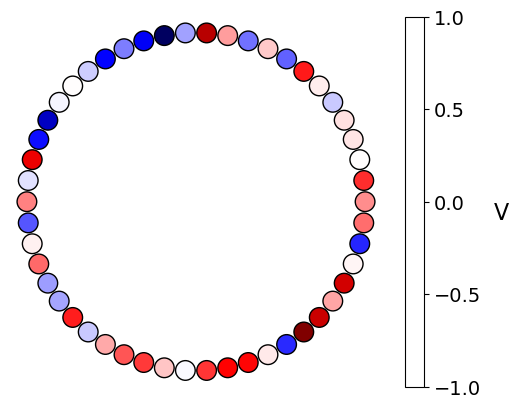

In [9]:

fig, ax = plt.subplots(figsize=(6, 6), facecolor='none')
plot_graph_on_circle(model.vs[10,:], model.L, ax)

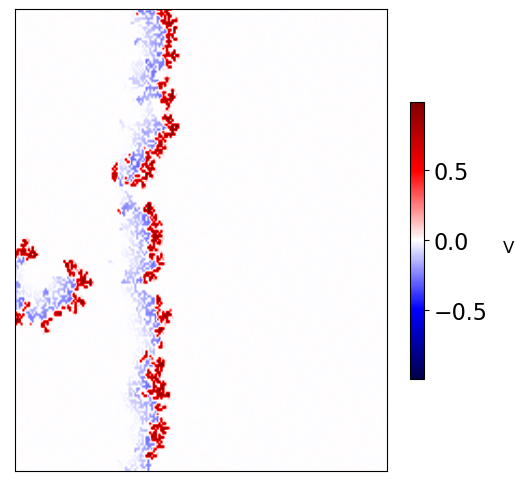

In [10]:
fig1, ax1 = plt.subplots(figsize=(6, 6), facecolor='none')
heart_plot(fig1, ax1, model, t_frame=1000)